<a href="https://colab.research.google.com/github/JonPaulBIlbao/GitHub-Test/blob/master/00_02_Excel_python_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning in Finance**
**Deusto Business School**

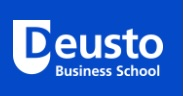

ADE + FAB

---

## Working with Excel Files using Python & pandas

### 1. Introduction
This notebook introduces how to read, clean, transform, and export Excel files using Python and pandas.

In [ ]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

### 2. Reading Excel files

In [ ]:
file_path = 'https://raw.githubusercontent.com/JonPaulBilbao/Machine-Learning-in-Finance-Python-2026/main/Datasets/Financial_Sample.xlsx'  # Upload or adjust path

df = pd.read_excel(file_path)
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Sale Price,Discounts,COGS,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,20,0.0,16185.0,2021-01-01,1,January,2021
1,Government,Germany,Carretera,NaN,1321.0,20,0.0,13210.0,2021-01-01,1,January,2021
2,Midmarket,France,Carretera,NaN,2178.0,15,0.0,21780.0,2021-06-01,6,June,2021
3,Midmarket,Germany,Carretera,NaN,888.0,15,0.0,8880.0,2021-06-01,6,June,2021
4,Midmarket,Mexico,Carretera,NaN,2470.0,15,0.0,24700.0,2021-06-01,6,June,2021


### Inspecting structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Segment        700 non-null    object        
 1   Country        700 non-null    object        
 2   Product        700 non-null    object        
 3   Discount Band  647 non-null    object        
 4   Units Sold     700 non-null    float64       
 5   Sale Price     700 non-null    int64         
 6   Discounts      700 non-null    float64       
 7   COGS           700 non-null    float64       
 8   Date           700 non-null    datetime64[ns]
 9   Month Number   700 non-null    int64         
 10  Month Name     700 non-null    object        
 11  Year           700 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 65.8+ KB


### 3. Create new variables

In [ ]:
# Create a new variable: total sales
df["Sales"] = df["Units Sold"] * df["Sale Price"]

# Create a second variable: net sales
df["Sales_net"] = df["Sales"] - df["Discounts"]

# Show the first rows
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Sale Price,Discounts,COGS,Date,Month Number,Month Name,Year,Sales,Sales_net
0,Government,Canada,Carretera,NaN,1618.5,20,0.0,16185.0,2021-01-01,1,January,2021,32370.0,32370.0
1,Government,Germany,Carretera,NaN,1321.0,20,0.0,13210.0,2021-01-01,1,January,2021,26420.0,26420.0
2,Midmarket,France,Carretera,NaN,2178.0,15,0.0,21780.0,2021-06-01,6,June,2021,32670.0,32670.0
3,Midmarket,Germany,Carretera,NaN,888.0,15,0.0,8880.0,2021-06-01,6,June,2021,13320.0,13320.0
4,Midmarket,Mexico,Carretera,NaN,2470.0,15,0.0,24700.0,2021-06-01,6,June,2021,37050.0,37050.0


### 4. Subset: Sales to Canada

In [ ]:
data_canada = df[df['Country'] == 'Canada']
len(data_canada)

140

### 5. Export to Excel

In [ ]:
data_canada.to_excel('data_canada_NEW.xlsx', index=False)

### 7. Create Excel with multiple sheets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales_by_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

with pd.ExcelWriter("/content/drive/MyDrive/financial_output.xlsx") as writer:
    df.to_excel(writer, sheet_name='full_data', index=False)
    data_canada.to_excel(writer, sheet_name='canada', index=False)
    sales_by_country.to_excel(writer, sheet_name='country_sales')

### 8. Date-based filename

In [ ]:
filename = f"data_canada_{date.today()}.xlsx"
data_canada.to_excel(filename, index=False)
filename

'data_canada_2025-11-30.xlsx'

### 9. Basic visualization

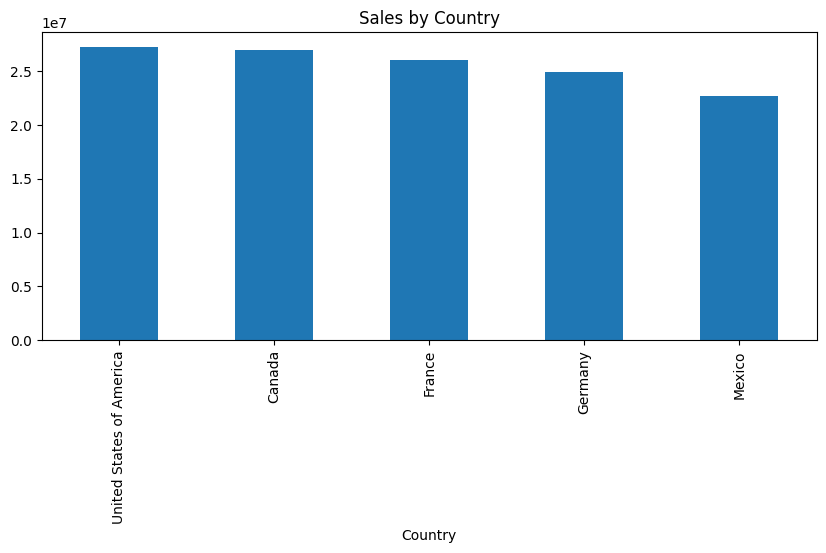

In [ ]:
sales_by_country.plot(kind='bar', figsize=(10,4))
plt.title('Sales by Country')
plt.show()

In [ ]:
data_canada.head()

,Segment,Country,Product,Discount Band,Units Sold,Sale Price,Discounts,COGS,Date,Month Number,Month Name,Year,Sales,Sales_net
0,Government,Canada,Carretera,NaN,1618.5,20,0.0,16185.0,2021-01-01,1,January,2021,32370.0,32370.0
7,Channel Partners,Canada,Montana,NaN,2518.0,12,0.0,7554.0,2021-06-01,6,June,2021,30216.0,30216.0
11,Enterprise,Canada,Montana,NaN,2665.5,125,0.0,319860.0,2021-07-01,7,July,2021,333187.5,333187.5
14,Enterprise,Canada,Montana,NaN,345.0,125,0.0,41400.0,2022-10-01,10,October,2022,43125.0,43125.0
16,Government,Canada,Paseo,NaN,292.0,20,0.0,2920.0,2021-02-01,2,February,2021,5840.0,5840.0
